In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import importlib
import nbimporter
import gif_generator
import models
import sklearn
import local_solvers

importlib.reload(gif_generator)
importlib.reload(models)
importlib.reload(local_solvers)

<module 'local_solvers' from 'local_solvers.ipynb'>

In [2]:
# initial parameters and data generation
d, w0 = 2, 20

# get the analytical solution over the full domain
x = torch.linspace(0,1,500).view(-1,1)
y = models.oscillator(d, w0, x).view(-1,1)
print(x.shape, y.shape)

# slice out a small number of points from the LHS of the domain
x_data = x[0:200:20]
y_data = y[0:200:20]
print(x_data.shape, y_data.shape)


torch.Size([500, 1]) torch.Size([500, 1])
torch.Size([10, 1]) torch.Size([10, 1])


local_solvers.ipynb:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "source": [
local_solvers.ipynb:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "import numpy as np\n",
local_solvers.ipynb:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "from sklearn.gaussian_process import GaussianProcessRegressor\n",


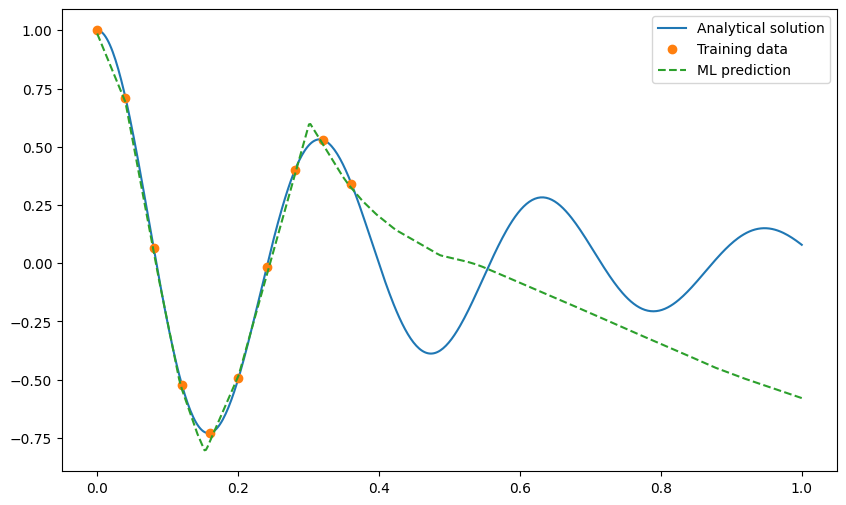

In [3]:
local_solvers.neural_net_solver(x_data, y_data, x, y)

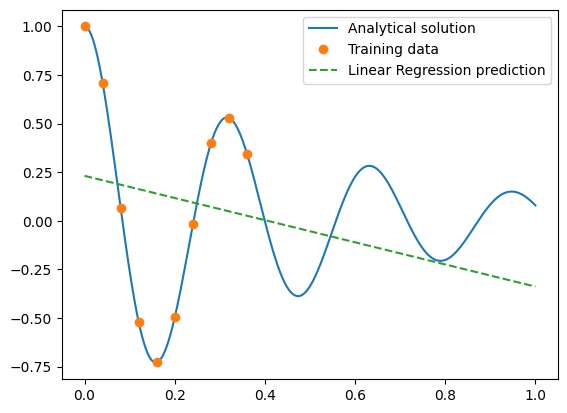

In [4]:
local_solvers.linear_regressor_solver(x_data, y_data, x, y)


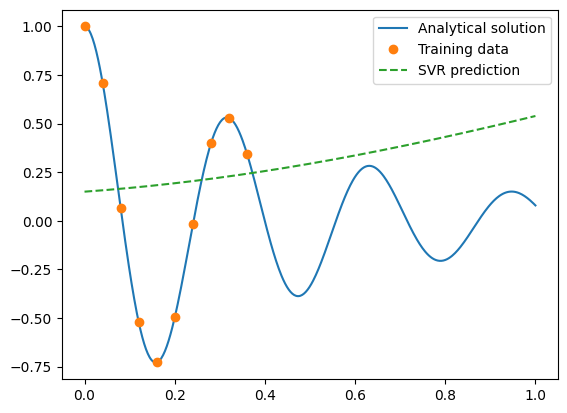

In [5]:
local_solvers.support_vector_solver(x_data, y_data, x, y)


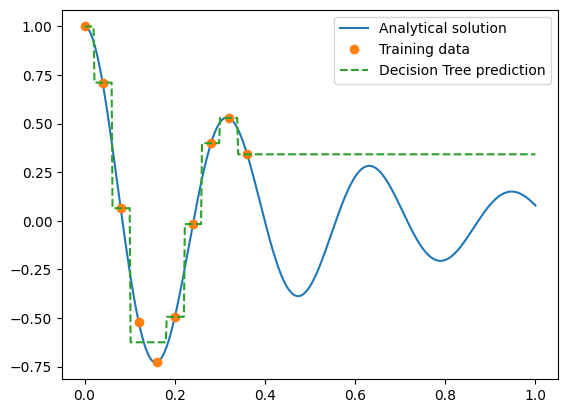

In [6]:
local_solvers.decision_tree_solver(x_data, y_data, x, y)

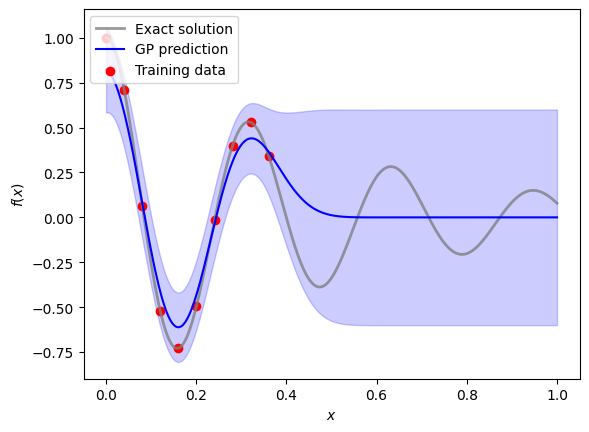

In [7]:
local_solvers.Gaussian_process_solver(x_data, y_data, x, y)


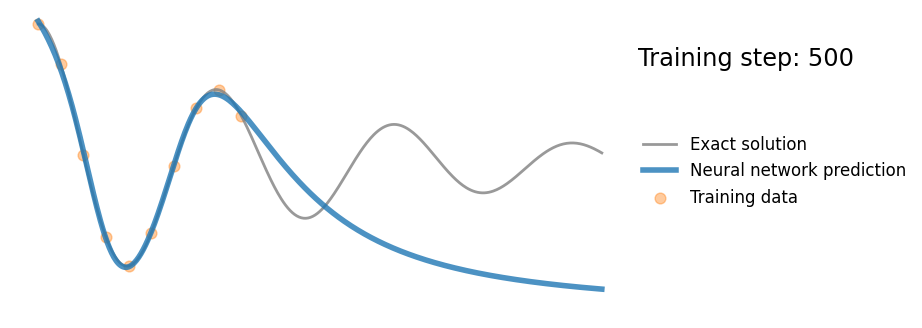

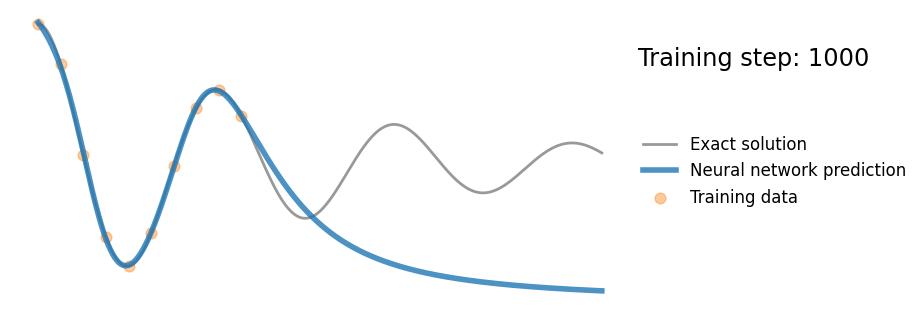

In [8]:
nn_files = local_solvers.optimized_nn_solver(x_data, y_data, x, y)

In [9]:
# Generate Gif for the damped harmonic oscillator
gif_generator.gen_osc_gif(x,y)

In [10]:
# Generate Gif for the optimised NN
gif_generator.save_gif_PIL("nn.gif", nn_files, fps=20, loop=0)